# Predict Career Longevity for NBA Rookies

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import datasets 
from pandas import MultiIndex, Int64Index
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, plot_roc_curve, accuracy_score

## Reading/Importing the data.

In [2]:
nba_train = pd.read_csv('Train_data.csv')
nba_test = pd.read_csv('Test_data.csv')

In [3]:
nba_train.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0


In [4]:
nba_train.shape

(1101, 20)

##  Datatypes/Features

In [5]:
nba_train.dtypes

GP         float64
MIN        float64
PTS        float64
FGM        float64
FGA        float64
FG%        float64
3P Made    float64
3PA        float64
3P%        float64
FTM        float64
FTA        float64
FT%        float64
OREB       float64
DREB       float64
REB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
Target       int64
dtype: object

In [6]:
nba_train.columns

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'Target'],
      dtype='object')

In [7]:
nba_train.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,59.008156,16.928284,6.502344,2.511125,5.645747,43.912555,0.241959,0.767455,19.050425,1.241914,1.741848,70.495847,0.958240,1.937014,2.891927,1.472706,0.589403,0.344204,1.150499,0.499546
std,17.236886,8.034209,4.163856,1.611502,3.422292,6.106910,0.363008,1.017214,15.513640,0.937585,1.272047,10.381068,0.771344,1.342627,2.039694,1.376592,0.386147,0.418840,0.687706,0.500227
min,11.000000,3.100000,1.100000,0.400000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,46.223257,10.492268,3.587756,1.400000,3.200000,40.000000,0.000000,0.000000,0.000000,0.600000,0.900000,64.900000,0.400000,1.000000,1.400000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,59.387147,15.386486,5.200000,2.000000,4.600000,43.652785,0.100000,0.300000,22.600000,1.000000,1.400000,71.502462,0.700000,1.600000,2.273596,1.041951,0.500000,0.200000,0.988945,0.000000
75%,76.000000,21.830403,8.300000,3.200000,6.900000,47.700000,0.400000,1.195634,32.300000,1.600000,2.200000,77.436718,1.300000,2.500000,3.700000,1.900000,0.800000,0.400000,1.400000,1.000000
max,82.000000,40.900000,24.300000,9.000000,18.900000,73.700000,2.300000,6.500000,100.000000,7.500000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.200000,1.000000


In [8]:
nba_train["Target"].value_counts()

0    551
1    550
Name: Target, dtype: int64

## Duplicated values

In [9]:
#Find the duplicates
nba_train.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1096    False
1097    False
1098    False
1099    False
1100    False
Length: 1101, dtype: bool

## Droping Duplicates

In [10]:
nba_train.drop_duplicates()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
1,31.0,10.7,3.4,1.2,3.3,35.3,0.5,2.1,25.8,0.5,0.9,55.2,0.3,1.1,1.4,0.4,0.3,0.1,0.2,0
2,48.0,9.3,4.5,1.7,3.4,49.7,0.0,0.1,0.0,1.2,1.9,61.5,0.4,0.8,1.2,0.8,0.5,0.4,1.0,0
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
4,58.0,18.4,5.8,1.9,5.3,36.7,0.0,0.1,25.0,1.9,3.1,61.7,0.5,0.7,1.2,1.9,1.1,0.2,1.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,49.0,8.3,4.5,1.8,3.9,46.6,0.0,0.1,0.0,0.8,1.2,70.2,0.6,0.7,1.3,0.5,0.3,0.3,0.6,1
1097,35.0,5.5,1.5,0.5,1.4,36.0,0.4,1.1,33.3,0.1,0.1,100.0,0.1,0.6,0.7,0.2,0.1,0.0,0.1,1
1098,65.0,13.2,5.0,2.0,5.0,41.3,0.1,0.3,35.0,0.8,1.0,76.9,0.6,1.0,1.6,1.1,0.7,0.3,0.8,0
1099,55.0,14.9,4.1,1.7,4.1,41.7,0.1,0.1,37.5,0.6,0.8,76.1,0.5,1.0,1.5,1.5,0.7,0.2,0.8,0


##  Detecting Missing values or Null values

In [11]:
nba_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101 entries, 0 to 1100
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GP       1101 non-null   float64
 1   MIN      1101 non-null   float64
 2   PTS      1101 non-null   float64
 3   FGM      1101 non-null   float64
 4   FGA      1101 non-null   float64
 5   FG%      1101 non-null   float64
 6   3P Made  1101 non-null   float64
 7   3PA      1101 non-null   float64
 8   3P%      1101 non-null   float64
 9   FTM      1101 non-null   float64
 10  FTA      1101 non-null   float64
 11  FT%      1101 non-null   float64
 12  OREB     1101 non-null   float64
 13  DREB     1101 non-null   float64
 14  REB      1101 non-null   float64
 15  AST      1101 non-null   float64
 16  STL      1101 non-null   float64
 17  BLK      1101 non-null   float64
 18  TOV      1101 non-null   float64
 19  Target   1101 non-null   int64  
dtypes: float64(19), int64(1)
memory usage: 172.2 KB


In [12]:
for i in nba_train.columns:
    print(nba_train[i].nunique())

274
514
392
289
366
480
132
216
349
258
285
554
243
281
306
279
219
201
241
2


In [13]:
career_less_fives = nba_train[nba_train['Target']!=0]
career_more_fives  = nba_train[nba_train['Target']==0]

In [14]:
career_less_fives.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
0,59.0,12.8,3.4,1.3,2.6,51.0,0.2,0.3,50.0,0.7,0.8,78.0,1.1,2.3,3.3,0.5,0.3,0.4,0.5,1
3,80.0,27.7,11.2,3.5,9.4,37.4,1.3,4.1,32.9,2.8,3.3,85.0,0.8,1.6,2.4,3.9,1.3,0.1,2.2,1
6,50.0,36.1,12.8,4.6,12.3,37.4,2.0,6.5,31.0,1.6,2.1,75.2,0.3,2.8,3.1,6.0,1.9,0.0,2.9,1
7,81.0,25.1,10.0,3.8,8.0,48.1,0.0,0.1,11.1,2.3,2.7,86.6,1.6,2.1,3.7,1.9,0.6,0.2,1.4,1
8,79.0,20.2,6.7,2.4,5.4,44.2,0.3,1.0,26.3,1.6,2.0,80.0,0.2,1.8,2.0,2.8,0.5,0.0,1.3,1


In [15]:
career_more_fives.head()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,Target
1,31.000000,10.700000,3.400000,1.200000,3.300000,35.300000,0.500000,2.100000,25.800000,0.500000,0.900000,55.200000,0.300000,1.100000,1.400000,0.400000,0.30000,0.100000,0.200000,0
2,48.000000,9.300000,4.500000,1.700000,3.400000,49.700000,0.000000,0.100000,0.000000,1.200000,1.900000,61.500000,0.400000,0.800000,1.200000,0.800000,0.50000,0.400000,1.000000,0
4,58.000000,18.400000,5.800000,1.900000,5.300000,36.700000,0.000000,0.100000,25.000000,1.900000,3.100000,61.700000,0.500000,0.700000,1.200000,1.900000,1.10000,0.200000,1.700000,0
5,50.458515,16.178170,5.199565,1.979040,5.237119,38.467247,0.416594,1.195634,34.858949,0.779040,0.987337,77.387337,0.491703,1.337554,1.829257,1.937119,0.67904,0.091703,0.916594,0
9,25.024069,9.244566,1.907221,0.837345,1.974690,40.545731,0.000000,0.000000,0.000000,0.265062,0.630124,48.373448,0.565062,1.569876,2.134938,0.297593,0.10000,0.637345,0.430124,0


## Visualizing the data

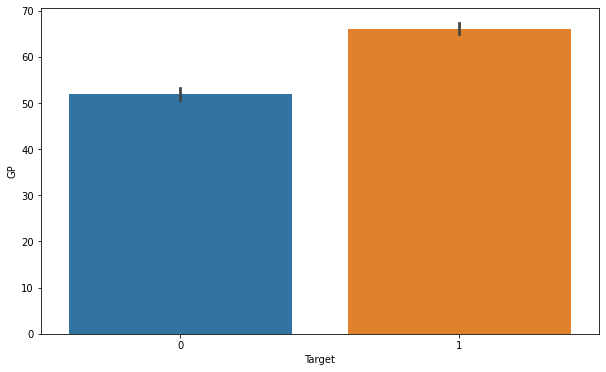

In [16]:
#visualizing targets 
plt.figure(figsize=(10,6))
sns.barplot(x='Target',y='GP', data = nba_train)
plt.xticks(rotation = 0)
plt.show()

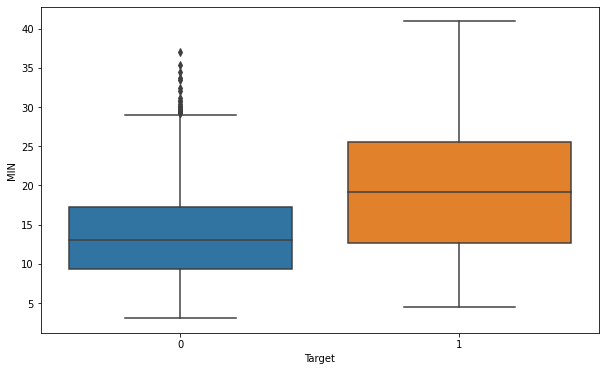

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Target',y='MIN', data = nba_train)
plt.xticks(rotation = 0)
plt.show()

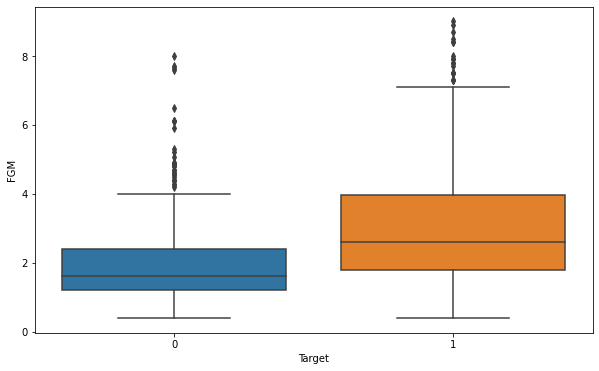

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Target',y='FGM', data = nba_train)
plt.xticks(rotation = 0)
plt.show()

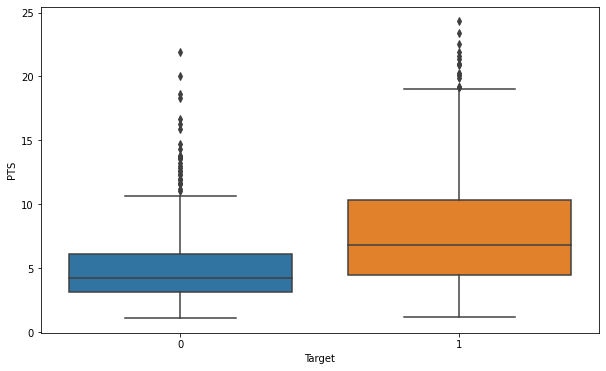

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Target',y='PTS', data = nba_train)
plt.xticks(rotation = 0)
plt.show()

<AxesSubplot:ylabel='Frequency'>

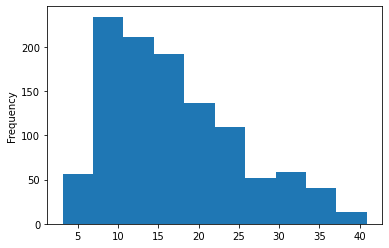

In [20]:
nba_train["MIN"].plot(kind="hist",)

<AxesSubplot:ylabel='Frequency'>

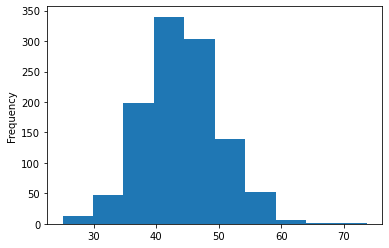

In [21]:
nba_train["FG%"].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

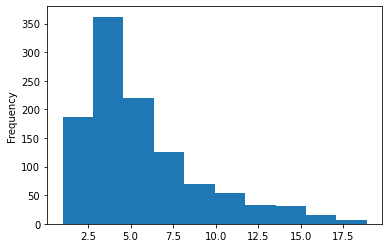

In [22]:
nba_train["FGA"].plot(kind="hist")

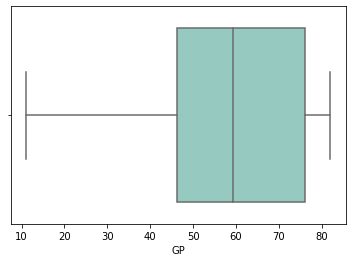

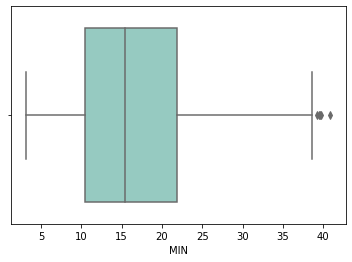

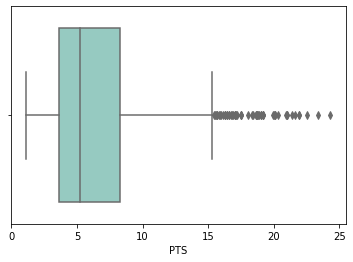

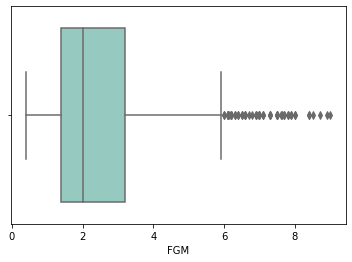

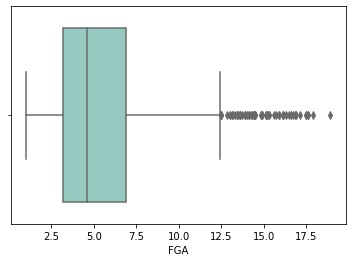

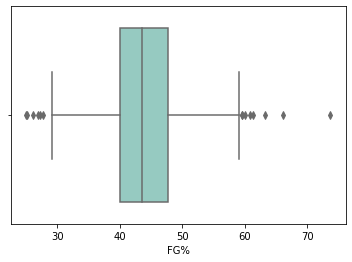

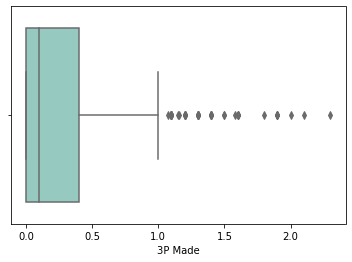

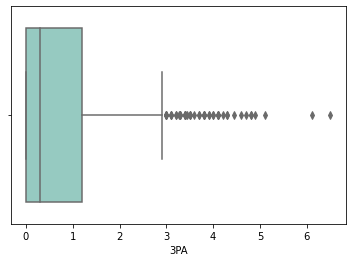

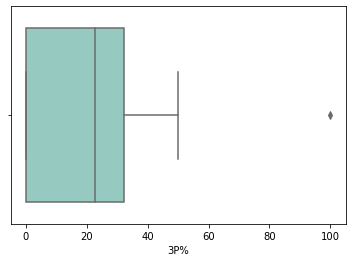

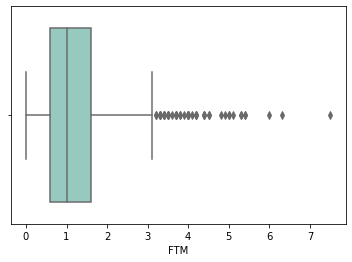

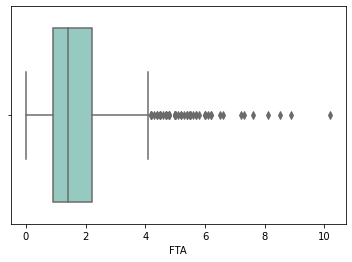

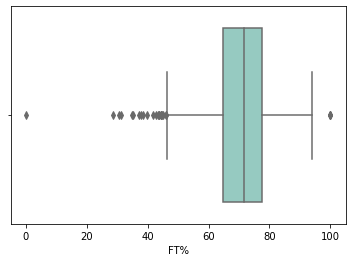

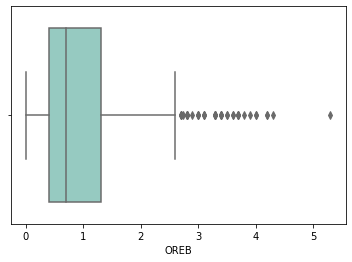

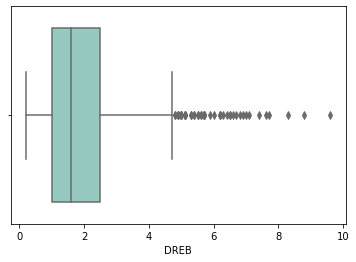

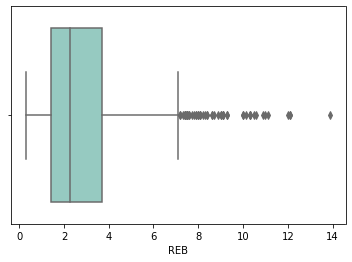

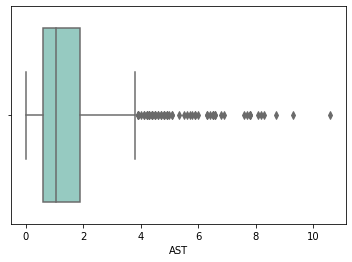

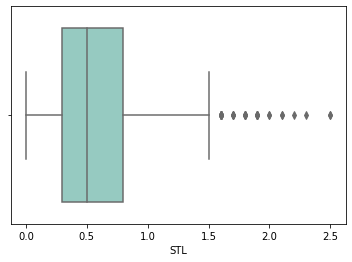

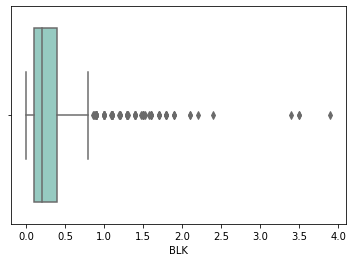

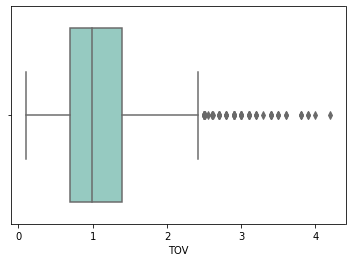

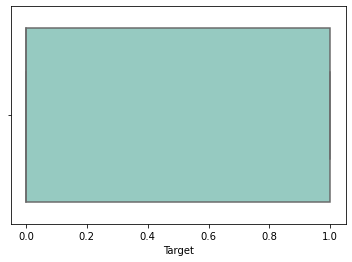

In [23]:
for i in nba_train.columns:
    sns.boxplot(x=nba_train[i], orient = 'h', palette = 'Set3')
    plt.show()

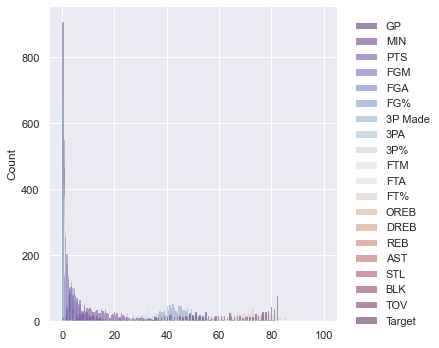

In [24]:
sns.set(rc = {'figure.figsize':(20,10)})
sns.displot(data= nba_train,palette='twilight_shifted')

In [25]:
nba_train.columns

Index(['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM',
       'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'Target'],
      dtype='object')

## Correlation in columns

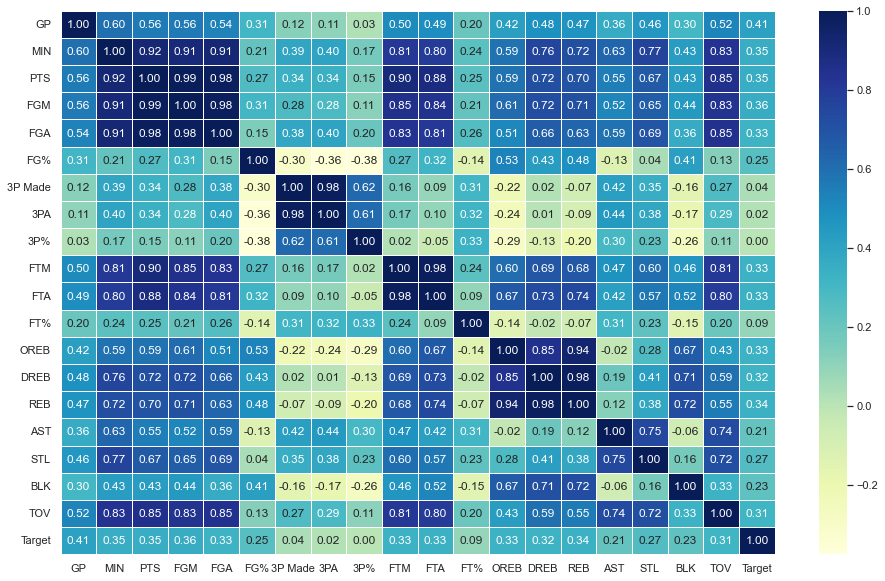

In [26]:
#Correlaton matrix
corr_matrix = nba_train.corr()
fig, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

 ## Separating Feature and Target value

In [27]:
X = nba_train.drop(columns='Target',axis=1)
y = nba_train['Target']

In [29]:
# Splitting into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
# Models dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier(),
         "XGBoost": XGBClassifier()}

## Model Evaluation 

In [ ]:
#Fucntion for evaluating the Model performance using various matrics
def evaluate_pred(y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test, y_pred)
    metric_data = {'accuracy':round(accuracy,2),'precision':round(precision,2),'recall':round(recall,2),'f1':round(f1,2)}
    
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_data 

In [32]:
# Function that will fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    #np.random.seed(42)
    #Dictionary of model scores
    model_scores = {}

        #Loop through models
    for name, model in models.items():
        clf = model
        clf.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [33]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Logistic Regression': 0.6923076923076923,
 'KNN': 0.6561085972850679,
 'Random Forest': 0.7647058823529411,
 'XGBoost': 0.7375565610859729}

In [34]:
#evaluating the performance of RandomForest
rfc = RandomForestClassifier(random_state=20,criterion='gini')

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_pred, y_test)

0.7375565610859729

In [35]:
evaluate_pred(y_pred, y_test)

Accuracy: 73.76%
Precision:0.68
Recall: 0.78
F1 score: 0.73


{'accuracy': 0.74, 'precision': 0.68, 'recall': 0.78, 'f1': 0.73}

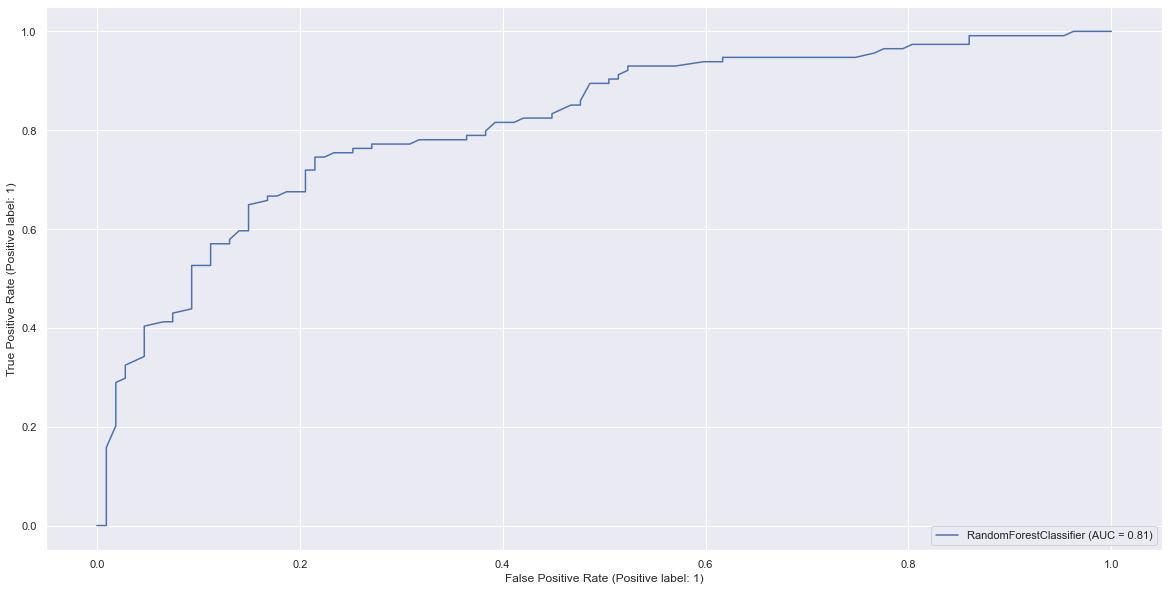

In [36]:
#Plot ROC Curve and calculate AUC for Random Forest
plot_roc_curve(rfc, X_test, y_test)

In [37]:
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(4, 4))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

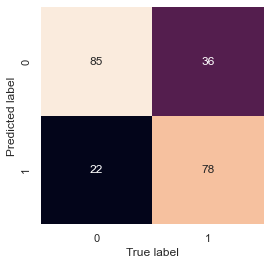

In [38]:
#confusion matrix for RFC
y_pred4 = rfc.predict(X_test)
plot_conf_mat(y_pred4, y_test)

In [39]:
cv_metrics = ["accuracy", "precision", "recall", "f1"]
def cv_calculator(cv_metrics, clf, X, y):
    cv_dict = {}
    for metric in cv_metrics:
        cv_dict[metric] = np.mean(cross_val_score(clf, X, y, cv=5, scoring=metric))
    return cv_dict

In [40]:
cv_dict4 = cv_calculator(cv_metrics, rfc, X, y)
cv_dict4

{'accuracy': 0.728412176059235,
 'precision': 0.7436496308215856,
 'recall': 0.6981818181818182,
 'f1': 0.7199150312957251}

<AxesSubplot:title={'center':'Random Forest CV Metrics'}>

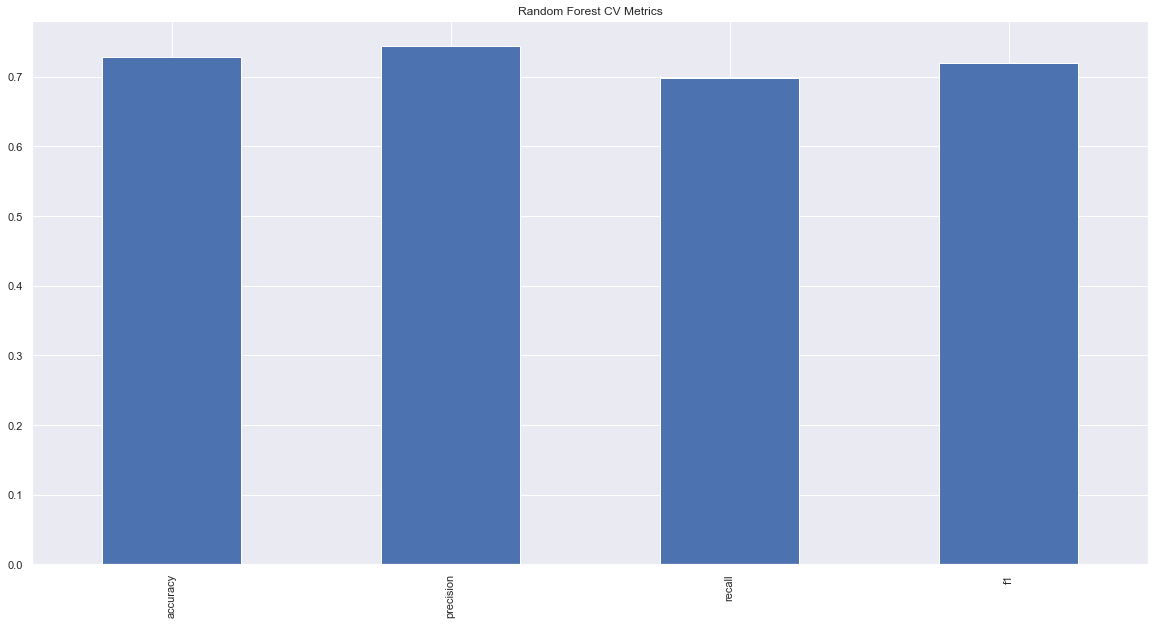

In [41]:
cv_metrics4 = pd.DataFrame(cv_dict4, index=["score"])
cv_metrics4.T.plot.bar(title="Random Forest CV Metrics", legend=False)

<AxesSubplot:title={'center':'Random Forest Feature Importance'}>

<Figure size 1080x360 with 0 Axes>

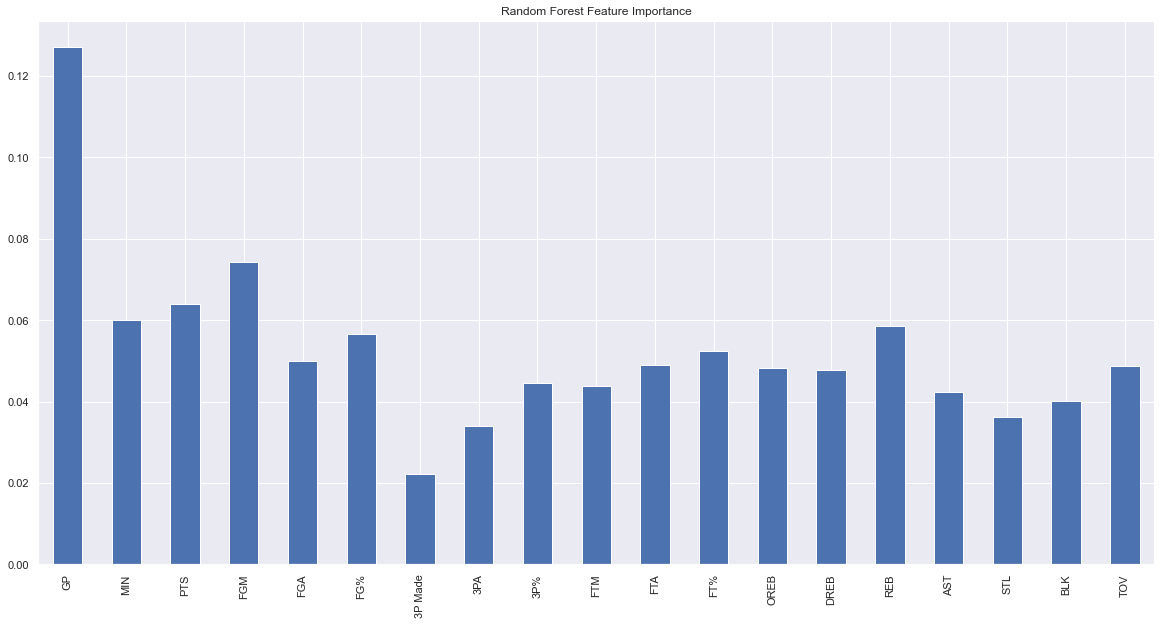

In [42]:
#creating feature importance dictionary
features_dict = dict(zip(nba_train.columns , rfc.feature_importances_))

#visualizing feature importance
plt.figure(figsize=(15, 5))
feature_df = pd.DataFrame(features_dict, index=[0])
feature_df.T.plot.bar(title="Random Forest Feature Importance", legend=False)

In [43]:
target = rfc.predict(nba_test) 

# For prediction file

In [45]:
res = pd.DataFrame(target) 
res.index = nba_test.index 
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False)     